<a href="https://colab.research.google.com/github/dheeraj0000/2216177_AIML_Bootcamp_2023/blob/main/KNN_algorrithm_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv('/content/SUV_Purchase.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
print(dataset.isnull().any())

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool


In [5]:
print(dataset.dtypes)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df=dataset.drop(['User ID','Gender'],axis=1)

In [8]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:
import matplotlib.pyplot as plt

In [10]:
x = dataset.iloc[:, [2, 3]].values
# output
y = dataset.iloc[:, 4].values

In [11]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [13]:
#normalizing(to transform features to be o a similar scale) the data-standardscaler
# standardscaler it helps converting all numerical values into the one range
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)
print ('train value:',xtrain[0:1, :])
print ('test value:',xtest[0:1, :])

train value: [[ 0.58164944 -0.88670699]]
test value: [[-0.80480212  0.50496393]]


Building model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=20) #20 is k value

In [15]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=20)

In [16]:
y_pred = model.predict(xtest)

In [17]:
print("predicted value for training value",model.score(xtrain,ytrain))
print("predicted value for testing value",model.score(xtest,ytest))
print(" accuracy value",model.score(sc_x.transform(x),y))
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))


predicted value for training value 0.9
predicted value for testing value 0.93
 accuracy value 0.9075
Accuracy :  0.93


Cross validation to dinf the best k value and make trials (backend part)



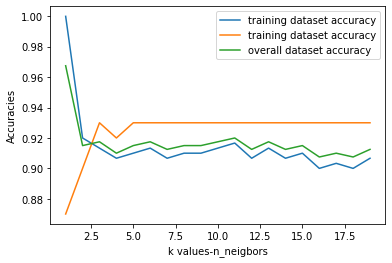

In [18]:
#this code is useful to find best k value using graphs
neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
overall_accuracy=np.empty(len(neighbors))
#loop over k values
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain,ytrain)
  #compute the training and testing accuracy of ML model
  train_accuracy[i]=knn.score(xtrain,ytrain)
  test_accuracy[i]=knn.score(xtest,ytest)

  #overall score
  overall_accuracy[i]=knn.score(sc_x.transform(x),y)

import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label="training dataset accuracy") 
plt.plot(neighbors,test_accuracy,label="training dataset accuracy") 
plt.plot(neighbors,overall_accuracy,label="overall dataset accuracy")
plt.legend() 
plt.xlabel('k values-n_neigbors')
plt.ylabel('Accuracies')
plt.show()